## Assignment 5
# Monte Carlo Integration
_(15 Points)_ Some integrands are unbounded and yet their integrals exist. Evaluate the integrals
$$\int_{0}^{1} \frac {dx} {\sqrt {x}},$$
$$\int_{0}^{1} \frac {\sin (x)} {\sqrt {1 - x}} dx$$

In [968]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stats
%matplotlib inline

Let us look into this integrals,

$$
\begin{align}
    \int_{0}^{1} \frac {dx} {\sqrt x},
\end{align}
$$

Notice that $\frac{d}{dx}(2\sqrt x) = \frac{1}{\sqrt{x}}$, therefore

$$
\int_{0}^{1} \frac {dx} {\sqrt x} =  \left[2\sqrt x\right]_0^1 = 2
$$

The second one is quite difficult but i found out that the approximate value is


$$\int_{0}^{1} \frac {\sin (x)} {\sqrt {1 - x}} dx \approx 1.18698.$$ With these results let's see each function

In [934]:
def montecarlo_integration(f, x_a, x_b, y_a, y_b, n):
    x = np.random.uniform(x_b, x_a, n)
    y = np.random.uniform(y_b, y_a, n)
    
    inside = y <= f(x)
    
    approximation = (x_a - x_b)*(y_a - y_b)*float(np.sum(inside))/n
    
    return approximation, x, y ,inside

def plot_montecarlo(x, y, approx, x_m, y_m, inside, yscale=None):
    plt.plot(x, y, 'g--')
    if yscale != None:
        plt.yscale('log')
    plt.scatter(x_m, y_m, s=0.01)
    plt.scatter(x_m[inside], y_m[inside], s=0.05, color="r")
    plt.show()
    
#LOL
def get_extreme(x,y):
    return max(x), min(x), max(y), min(y)

def avg(a):
    return sum(a) / len(a)

def errorfn(approxs):
    mean = avg(approxs)
    delta_sum = sum([(x - mean)**2 for x in approxs])
    return math.sqrt(delta_sum/len(approxs))

def compute_error(apprx):
    approx = []
    errors = []
    for a in apprx:
        approx.append(a)
        e = errorfn(approx)
        errors.append(e)
    return errors

To be closer to the expected value we will use the maximum and minimum as parameters to the random number generator.  

In [595]:
x_1a, x_1b, y_1a, y_1b = get_extreme(x_1, y_1)
x_2a, x_2b, y_2a, y_2b = get_extreme(x_2, y_2)

print("x_1a={}, x_1b={}, y_1a = {}, y_1_b={}".format(x_1a, x_1b, y_1a, y_1b))
print("x_2a={}, x_2b={}, y_2a = {}, y_2_b={}".format(x_2a, x_2b, y_2a, y_2b))

x_1a=1.0, x_1b=1e-07, y_1a = 3162.277660168379, y_1_b=1.0
x_2a=0.9999999, x_2b=0.0, y_2a = 2660.9647267796, y_2_b=0.0


now we will approach the integral between these values by using montecarlo integration.

CPU times: user 3.48 ms, sys: 0 ns, total: 3.48 ms
Wall time: 1.6 ms
real value = 2, montecarlo estimate = 0.0, difference = 2.0


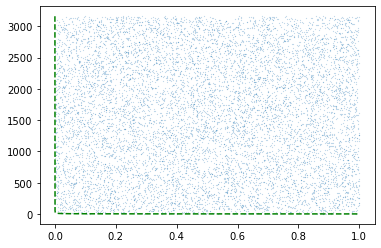

In [596]:
N = 10000
%time f_1_approx, x_1m, y_1m, inside_1 = montecarlo_integration(f_1, x_1a, x_1b, y_1a, y_1b, N)
print("real value = {}, montecarlo estimate = {}, difference = {}".format(REALVALUE_f_1, f_1_approx, REALVALUE_f_1-f_1_approx))
plot_montecarlo(x_1, y_1, f_1_approx, x_1m, y_1m, inside_1)

The error is too big, and there are two reasons, the integral converges to $2$ but some analytical manipulationsare necessary to get this value, the montecarlo method does not use this intuition, and as we see, the function is not defined on $x=0$, therefore it will never get sufficiently close, because (numerically) as $x \to 0$ the value of the function tends to a much greater value, as the denominator get smaller, the float point rounding derived from the computation introduce errors, which lead us to the second part of the problem, (the computational part), the function has values that are too small if we change the scale it will become clearer

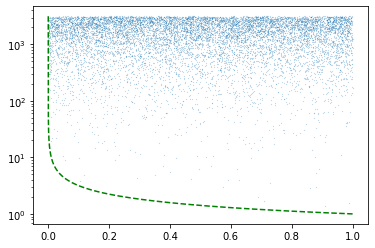

In [597]:
plot_montecarlo(x_1, y_1, f_1_approx, x_1m, y_1m, inside_1, yscale='log')

Most of the values are too far to the area of interest, and this is an implication from the firstpart, as $x \to 0$ the values of the function become larger, that at somepoint the random number generator will need more points to explore our area of interest, just as an example we'll try with $N=10e6$

CPU times: user 156 ms, sys: 0 ns, total: 156 ms
Wall time: 155 ms
real value = 2, montecarlo estimate = 1.0090797282177637, difference = 0.9909202717822363


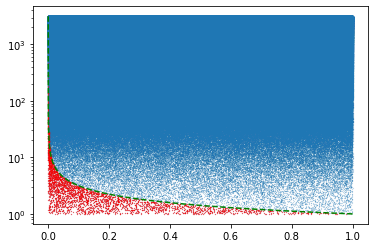

In [611]:
%time I= montecarlo_integration(f_1, x_1a, x_1b, y_1a, y_1b, int(10e6))
print("real value = {}, montecarlo estimate = {}, difference = {}".format(REALVALUE_f_1, I[0], REALVALUE_f_1-I[0]))
plot_montecarlo(x_1, y_1, I[0], I[1], I[2], I[3], yscale='log')

So there is a tradeoff if we choose to get closer to $0$, but then, what can we do? I have two ideas, the first one is to  make a choice on the largest value that we are going to take for $f(0) = C$, by doing this we are reducing rouding errors of float-point operations and reducing the area for the random number generator, but a commitment is required on the choice of this number, if that is the case we are basically chopping some area ofthe integral. the second one, is 'slice' the areas of interest such that $f(x)$ on that particular interval is smaller (actually quite similar to Riemmann sums) such that we are reducing the area for the RNG, first we need to do an 'intelligent' slicing, to do this we'll have to sample first, we'll use a histogram over the values of $x$ but on the function using the first idea.

CPU times: user 18.4 ms, sys: 106 µs, total: 18.5 ms
Wall time: 18.4 ms
real value = 2, montecarlo estimate = 1.81, difference = 0.18999999999999995


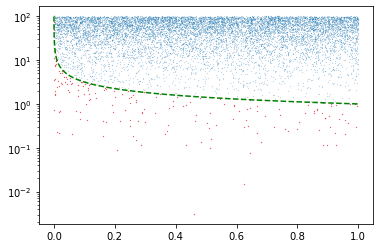

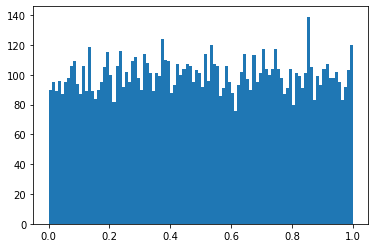

In [920]:
def f_1approx(f, x, C):
    result = []
    for x_i in x:
        if x_i==0:
            result.append(C)
        else:
            result.append(f(x_i))
    return result

def montecarlo_integration2(f, f_approx, x_a, x_b, y_a, y_b, n, C):
    x = np.random.uniform(x_b, x_a, n)
    y = np.random.uniform(y_b, y_a, n)
    
    inside = y <= f_approx(f, x,C)
    
    approximation = (x_a - x_b)*(y_a - y_b)*float(np.sum(inside))/n
    
    return approximation, x, y ,inside

N = 10000
C = f_1(0.0001)

x_1approx = np.linspace(0, 1, N)
y_1approx = f_1approx(f_1, x_1approx, C)

e = get_extreme(x_1approx, y_1approx)

%time I= montecarlo_integration2(f_1, f_1approx, e[0], e[1], C, 0, N, C)
print("real value = {}, montecarlo estimate = {}, difference = {}".format(REALVALUE_f_1, I[0], REALVALUE_f_1-I[0]))
plot_montecarlo(x_1approx, y_1approx, I[0], I[1], I[2], I[3], yscale='log')

counts_x1, bins_x1 = np.histogram(I[1], bins=100)
q = plt.hist(bins_x1[:-1], bins_x1, weights=counts_x1)

In [921]:
f_1(9.99967445e-01)

1.0000162778974464

By chance the we can obtain $2$, and only by using only the first idea, this can be improved, because as is shown on the scatter plot, there is still a larger area for the RNG to produce numbers over the region of interest, now that we have a way to slice these regions we can have a better sampling and by doing that the error will be reduced and we can do this by appying the previous idea

1.977303661172095


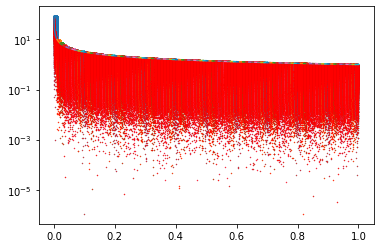

In [922]:
i = 0
approximation = 0

while i < len(bins_x1)-1:
    i_x = bins_x1[i+1], bins_x1[i]
    i_y = f_1(bins_x1[i]), 0
    
    v_x = np.linspace(i_x[1], i_x[0], N)
    v_y = f_1(v_x)
    plt.plot(v_x,v_y)
    
    I_i = montecarlo_integration2(f_1, f_1approx, i_x[0], i_x[1], i_y[0], 0, N, f_1(bins_x1[i+1]))
    
    inside = I_i[3]
    
    plt.scatter(I_i[1], I_i[2], s=0.1)
    plt.scatter(I_i[1][inside], I_i[2][inside], s=0.1, color='r')
    plt.yscale('log')
    #plt.show()
    
    approximation += I_i[0]
    i += 1

print(approximation)

To compute the accuracy we will use the second method(increasing the bins on the histogram) and the mean error.

In [932]:
n = 10
approximations = []
errors = []
for n in range(n, 100):
    counts_xa1, bins_xa1 = np.histogram(I[1], bins=n)
    #compute precise sample
    approximation = 0
    i=0
    while i < len(bins_xa1)-1:
        i_x = bins_xa1[i+1], bins_xa1[i]
        i_y = f_1(bins_xa1[i]), 0      

        I_i = montecarlo_integration2(f_1, f_1approx, i_x[0], i_x[1], i_y[0], 0, N, f_1(bins_xa1[i+1]))

        approximation += I_i[0]
        i += 1    
    approximations.append(approximation)

In [935]:
error = compute_error(approximations)

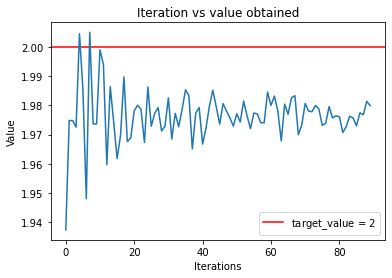

In [940]:
plt.title(r'Iteration vs value obtained')
plt.axhline(y=REALVALUE_f_1, color='r', linestyle='-', label=r'target_value = $2$')
plt.legend()
plt.xlabel(r'Iterations')
plt.ylabel(r'Value')
plt.plot(approximations)

Which was actually, expected. We'll do the same on the second integral.

CPU times: user 4.25 ms, sys: 9 µs, total: 4.26 ms
Wall time: 2.11 ms
real value = 1.18698, montecarlo estimate = 1.8626751224781892, difference = -0.6756951224781893


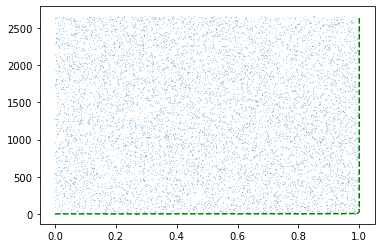

In [941]:
N = 10000
%time f_2_approx, x_2m, y_2m, inside_2 = montecarlo_integration(f_2, x_2a, x_2b, y_2a, y_2b, N)
print("real value = {}, montecarlo estimate = {}, difference = {}".format(REALVALUE_f_2, f_2_approx, REALVALUE_f_2-f_2_approx))
plot_montecarlo(x_2, y_2, f_2_approx, x_2m, y_2m, inside_2)

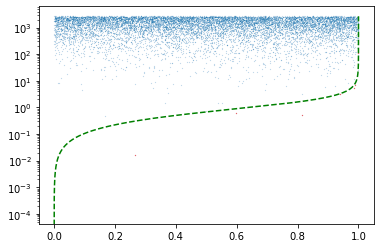

In [942]:
plot_montecarlo(x_2, y_2, f_2_approx, x_2m, y_2m, inside_2, yscale='log')

CPU times: user 282 ms, sys: 0 ns, total: 282 ms
Wall time: 287 ms
real value = 1.18698, montecarlo estimate = 1.18758843880288, difference = -0.0006084388028799737


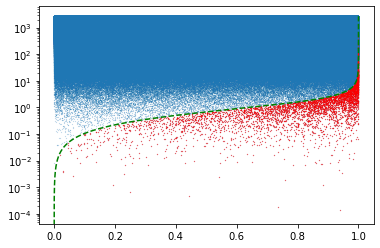

In [943]:
%time I= montecarlo_integration(f_2, x_2a, x_2b, y_2a, y_2b, int(10e6))
print("real value = {}, montecarlo estimate = {}, difference = {}".format(REALVALUE_f_2, I[0], REALVALUE_f_2-I[0]))
plot_montecarlo(x_2, y_2, I[0], I[1], I[2], I[3], yscale='log')

CPU times: user 28.9 ms, sys: 0 ns, total: 28.9 ms
Wall time: 28.9 ms
real value = 1.18698, montecarlo estimate = 1.051771187962614, difference = 0.135208812037386


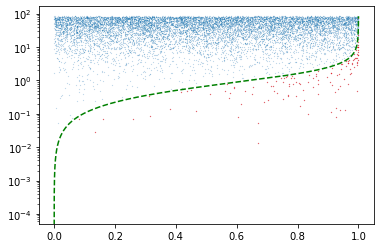

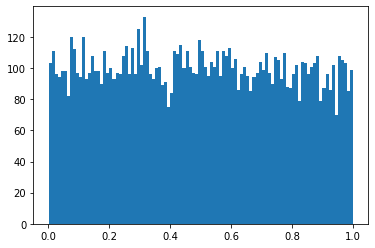

In [944]:
def f_2approx(f, x, C):
    result = []
    for x_i in x:
        if x_i==1:
            result.append(C)
        else:
            result.append(f(x_i))
    return result

N = 10000
C_2 = f_2(0.9999)

x_2approx = np.linspace(0, 1, N)
y_2approx = f_2approx(f_2, x_2approx, C_2)

e = get_extreme(x_2approx, y_2approx)

%time I= montecarlo_integration2(f_2, f_2approx, e[0], e[1], C_2, 0, N, C_2)
print("real value = {}, montecarlo estimate = {}, difference = {}".format(REALVALUE_f_2, I[0], REALVALUE_f_2-I[0]))
plot_montecarlo(x_2approx, y_2approx, I[0], I[1], I[2], I[3], yscale='log')

counts_x2, bins_x2 = np.histogram(I[1], bins=100)
q = plt.hist(bins_x2[:-1], bins_x2, weights=counts_x2)

In this case we have to change the to evaluate the area from $x_{i+1}$ to $x_i$

1.1791177597724802


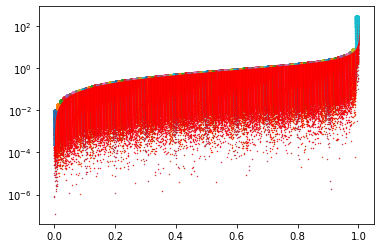

In [945]:
i = 0
approximation = 0

min_y = None

while i < len(bins_x2)-1:
    i_x = bins_x2[i+1], bins_x2[i]
    i_y = f_2(bins_x2[i+1]), 0
    
    v_x = np.linspace(i_x[1], i_x[0], N)
    v_y = f_2(v_x)
    
    if min_y == None:
        min_y = min(v_y)
        #plt.axhline(y=min_y, color='b', linestyle='-',linewidth=0.5)
        
    plt.plot(v_x,v_y)
    
    I_i = montecarlo_integration2(f_2, f_2approx, i_x[0], i_x[1], i_y[0], 0, N, f_2(bins_x2[i]))
    
    inside = I_i[3]
    
    plt.scatter(I_i[1], I_i[2], s=0.1)
    plt.scatter(I_i[1][inside], I_i[2][inside], s=0.1, color='r')
    plt.yscale('log')
    #plt.show()
    
    approximation += I_i[0]
    i += 1

print(approximation)

In [962]:
n = 10
approximations_2 = []

for n in range(n, 100):
    counts_xa2, bins_xa2 = np.histogram(I[1], bins=n)
    #compute precise sample
    approximation = 0
    i=0
    while i < len(bins_xa2)-1:
        i_x = bins_xa2[i+1], bins_xa2[i]
        i_y = f_2(bins_xa2[i+1]), 0

        I_i = montecarlo_integration2(f_2, f_2approx, i_x[0], i_x[1], i_y[0], 0, N, f_2(bins_xa2[i]))

        approximation += I_i[0]
        i += 1    
    approximations_2.append(approximation)

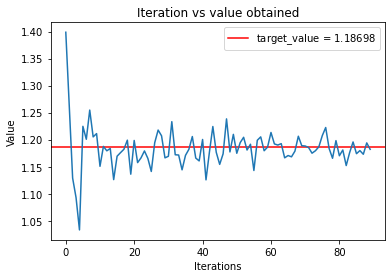

In [963]:
#compute error
error_2 = compute_error(approximations_2)
#plot error
plt.title(r'Iteration vs value obtained')
plt.axhline(y=REALVALUE_f_2, color='r', linestyle='-', label=r'target_value = $1.18698$')
plt.legend()
plt.xlabel(r'Iterations')
plt.ylabel(r'Value')
plt.plot(approximations_2)

Which is a better estimate but still has a big error, let's try the other method which I will call "Sliced Monte Carlo Integration". To choose the intervals we have to see at the histogram to verify where are most of the values on $x$.

# Pseudorandom number generators with linear structures
_(15 Points)_ Crack, i.e., find(m,a,c,x0), the following sequence1:

$$\left[ 61., 262., 151., 304., 785., 122., 427., 228., 613., 110., 831., 280., 569., 226., 339., 460., 653., 470., 999., 768.\right]$$

Provide the code used.

In [954]:
def compute_n_terms(n,seed, a, c, m):
    numbers = [seed]
    for i in range(1,n):
        numbers.append((numbers[i-1]*a + c) % m)
    return numbers

def crack(r_1, r_2, r_3, seeds):
    founded_a = 1    
    founded_c = 1
    founded_m = 1
    numbers_founded = False
    for i in r_1:
        for j in r_2:
            for l in r_3:
                numbers = compute_n_terms(20, seeds[0], i, j, l)
                if numbers == seeds:
                    numbers_founded = True
                    founded_m = l
                    founded_c = j
                    founded_a = i
                    break
            if numbers_founded == True:
                break
        if numbers_founded == True:
            break
    return numbers_founded, founded_a, founded_c, founded_m

In [955]:
seeds = [61, 262, 151, 304, 785, 122, 427, 228, 613, 110, 831, 280, 569, 226, 339, 460, 653, 470, 999, 768]

In [958]:
# The first time took 26min to compute.
N = 2000
r_1 = range(100,150)
r_2 = range(1,100)
r_3 = range(1010,1050)
%time founded, f_a, f_c, f_m = crack(r_1, r_2, r_3, seeds)

CPU times: user 465 ms, sys: 0 ns, total: 465 ms
Wall time: 463 ms


In [961]:
if founded == False:
    print("Not founded in range")
else:
    print("Founded: m={}, a={}, c={}".format(f_m, f_a, f_c))

Founded: m=1024, a=137, c=97


_(20 Points)_ Together with this assignment you will find a sequence of 100.000 numbers (“Sequence.txt”) gen-erated with the brand newPPPalgorithm. Your task will be to test if the algorithm passes theχ2Test.1Hint: In “Marsaglia, G. (2003). Random number generators. Journal of Modern Applied Statistical Methods, 2(1), 2.”, Marsaglia describesan algorithm for identifying and cracking a PRNG based on a congruential generator. The attack determines the modulomof the LCG byfinding the greatest common divisor (GCD) of the volumes of parallelepipeds described by vectors taken from the LCG sequence. You mayfind that useful.1

In [979]:
def load_data(path):
    data = []
    f = open(path, 'r')
    lines = f.readlines()
    for l in lines:
        data.append(float(l))
    return data

def compute_chi_squared(counts, expected, df):
    result = (counts-expected)**2/expected
    return np.sum(result)

def compute_stats(data):
    mean = stats.mean(data)
    median = stats.median(data)
    deviation = stats.stdev(data,mean)
    maximum = max(data)
    minimum = min(data)
    mode = stats.mode(data)
    
    return dict({"mean": mean, "median": median, "std_dev": deviation, "max": maximum, "min": minimum, "mode": mode})

<module 'statistics' from '/opt/anaconda/anaconda3/lib/python3.8/statistics.py'>


{'mean': 0.50073988868212,
 'median': 0.501655,
 'std_dev': 0.28817480533418033,
 'max': 0.99999,
 'min': 4.2431e-05,
 'mode': 0.56508}

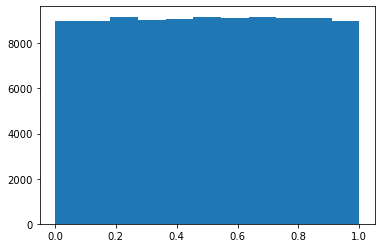

In [982]:
PATH = 'Sequence.txt'
COMPUTE_GRAPHS = True
VERBOSE = True

data = load_data(PATH)

st = compute_stats(data)

if VERBOSE:
    print(stats)

x = []
y = []

loops = int((len(data) - (len(data) % 2))/2)

# Chi squared
BINS = 11
counts, bin_edges = np.histogram(data, bins=BINS)

if COMPUTE_GRAPHS:
    plt.hist(data, bins=BINS)
    plt.plot()

df = len(bin_edges) - 1
expected_values = np.ones(len(counts))*(100000/BINS)

chi_squared_computed = compute_chi_squared(counts, expected_values, df)
st

As we can see in the graph it seems uniform, the mean and the median, confirms that, but the standard deviation tells us a different story that it is visible from the graph, if the data is between 0 and 1 with an average difference of $0.288$, we see that the data is closely related to a uniform distribution. The test will determine numerically how uniform these generated values are.

On the $\chi^2$ test, we compute $\chi^2$ with the following equation
\begin{equation}
\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i},
\end{equation}
where $n$ is the number of intervals, $O_i$ is the observed value and $E_i$ is the expected value. Then we lookup on the $\chi^2$ table for an $\alpha=0.05$(generally) and an $n-1$ degrees of freedom. And formulate a hypothesis($\textit{Null Hypothesis}$): There is no difference between our computed distribution (the generated numbers) and the theoretical distribution. If the sum is less than $\chi^2_{[1-\alpha;n-1]}$, then the previous hypothesis cannot be rejected at the level of significance $\alpha$:
$$\sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} < \chi^2_{[1-\alpha;n-1]}$$

we choose our $n=11$ and to formulate an expected value for every bin, we state that the expected value is $\frac{100000}{11} \approx 9090.90$, because we are assuming that the values are related to a uniform distribution.

The following results resume our computation for $\chi^2$


In [985]:
chi_squared_computed

5.3124400000000005

Now we compare our $\chi^2$ with  the value on the table, for a $\nu = 11 - 1 = 10$, and $p = 1 - 0.05$ is $18.31$, as we can see $5.312 < 18.31$ so the hypothesis cannot be rejected at least with a level of significance of $0.05.$

![chi_2_table](chi_table.png)